# Pràctica 6: Naive Bayes


> #  Miquel Monge Dalmau

## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent **dijous abans de les 23:59**, és a dir, quasibé tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, **sense ZIP**, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta pràctica tractará els següents temes:

* A. Ús Naive Bayes Sci-kit Learn (60%)
* B. Implementació Naive Bayes (40%)

Per descomptat, tots els experiments seguiran aplicant els coneixements apresos a les pràctiques anteriors, és a dir, aplicant una metodologia correcta de crosvalidació per tal de poder extreure conclusions vàlides.

<a href="https://www.flickr.com/photos/mattbuck007/3676624894"><img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2014/12/naive-bayes-classifier.jpg" width=500></a>


## Introducció

Els models Naive Bayes són un grup d’algoritmes de classificació extremadament ràpids i senzills que sovint són adequats per a conjunts de dades de molt alta dimensió.

Com que són tan ràpids i tenen tan pocs paràmetres, acaben sent molt útils com a ràpid baseline per a un problemes de classificació senzills.

Aquesta secció se centrarà en una explicació intuïtiva de com funcionen els classificadors ingenus de Bayes.


### Classificació bayesiana

Els classificadors de Bayes ingenus es basen en el teorema de Bayes, que és una equació que descriu la relació de probabilitats condicionals de quantitats estadístiques.

A la classificació bayesiana, ens interessa trobar la probabilitat d'una etiqueta donades algunes característiques observades, que podem escriure com $ P (y ~|~ X) $.

El teorema de Bayes ens explica com expressar-ho en termes de quantitats que podem calcular més directament:

$$
P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots, x_n \mid y)}
                                 {P(x_1, \dots, x_n)}
$$

Utilitzant l'assumpció ingenua d'independencia condicional, podem simplificar la relació per tot $i$.

$$
P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                 {P(x_1, \dots, x_n)}
$$

Ja que $P(x_1, \dots, x_n)$ és constant donada una entrada, es pot utilitzar la següent simplificació, que será donarà un resultat proporcional al real, per tant, tindrem la mateixa sortida.

$$ P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y) $$

La classificació final s'obtindrà:

$$ \hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y) $$


Tingueu en compte que $P (y)$ també s’anomena **probabilitat de classe** i $P (x_i | y)$ s’anomena **probabilitat condicional**. 

Els diferents classificadors ingenus de Bayes es diferencien principalment pels supòsits que fan sobre la distribució de $P (x_i | y)$. 

Intentem aplicar la fórmula anterior manualment al nostre conjunt de dades meteorològiques. 
    

### Exemple:

Anem a veure un exemple [(extret d'aquesta web)](https://www.geeksforgeeks.org/naive-bayes-classifiers/). Considereu aquestes dades meteorològiques:

In [92]:
import pandas as pd

dataGolf = pd.read_csv('playgolf.csv', delimiter=';')
display(dataGolf)

,Outlook,Temperature,Humidity,Windy,PlayGolf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


Haurem de fer algunes precomputacions al nostre conjunt de dades. Hem de trobar $P (x_i | y_j)$ per a cada $x_i$ a $X$ i $y_j$ a $y$. Tots aquests càlculs es mostren a les taules següents:


<img src="https://media.geeksforgeeks.org/wp-content/uploads/naive-bayes-classification.png" width=500>



Cada taula ha calculat $P(x_i | y_j)$ per cada $x_i$ en $X$ i $y_j$ en $y$. Per exemple, la probabilitat de jugar a golf donat que la temperatura és fresca, és a dir, $P(temperature = Cool | PlayGolf = Yes) = 3/9$.

A més, hem de trobar les probabilitats de classe ($P (y)$). Per exemple, $P (PlayGolf = Yes) = 9/14$.

Ja podem fer servir el classificador ingenu de Bayes. Per exemple, si avui tenim aquestes condicions climatològiques, jugarem al golf?

In [93]:
today_golf = ['Sunny', 'Hot', 'Normal', False]

$P(Yes|today) = \frac{P(Outlook=Sunny|Yes) P(Temperature=Hot|Yes) P(Humidity=Normal|Yes) P(Wind=False|Yes) P(Yes)}{P(today)}$

$P(No|today) = \frac{P(Outlook=Sunny|No) P(Temperature=Hot|No) P(Humidity=Normal|No) P(Wind=False|No) P(No)}{P(today)}$

Ignorem el $P(today)$ per què es comú a les dues probabilitats, i calculem:

$$P(Yes|today) \propto \frac{2}{9}·\frac{2}{9}·\frac{6}{9}·\frac{6}{9}·\frac{9}{14} \simeq 0.0141 $$

$$P(No|today) \propto \frac{3}{5}·\frac{2}{5}·\frac{1}{5}·\frac{2}{5}·\frac{5}{14} \simeq 0.0068 $$

Podem normalitzar-ho per sumar 1, 
$$P(Yes|today) = \frac{0.0141}{0.0068+0.0141}=0.67$$
$$P(No|today) = \frac{0.0068}{0.0068+0.0141}=0.33$$

In [94]:
today_df_golf = pd.DataFrame([today_golf], columns = ['Outlook','Temperature', 'Humidity','Windy'])

In [95]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB

X_golf = dataGolf.drop("PlayGolf", axis="columns")
y_golf = dataGolf["PlayGolf"]

enc = OrdinalEncoder()
enc.fit(X_golf)
X_golf_encoded = enc.transform(X_golf)

model_cat = CategoricalNB(alpha=1)
model_cat.fit(X_golf_encoded, y_golf)

model_cat.predict_proba(enc.transform(today_df_golf))

array([[0.22086561, 0.77913439]])

### Tipus de Classificadors Naive Bayes
Tot el que necessitem ara és algun model per calcular **$ P(x_i \mid y) $** per a cada etiqueta, i n'existeixen varis depenent del tipus de dades. 

Podeu trobar l'explicació més precisa a la documentació, pero a continuació n'explicarem els trets fonamentals (Sabrieu dir quin model hem fet servir en l'exemple anterior?):

Tingueu en compte que $\alpha$ es un prior de suavització, i tenen en compte característiques no vistes durant l'aprenentatge. Impedeixen probabilitats nul·les en altres càlculs. Si $\alpha = 1$, s’anomena suavització de Laplace, mentre que $\alpha < 1$ s’anomena suavització de Lidstone.


#### [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)
Si tenim dades continues, i creiem que asumeixen una distribució normal, les podem modelitzar amb la mitja i la desviació estandar.
$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

#### [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes)
Es fa servir si tenim caracteristiques que compten occurencies. Per exemple, en text, si comptem quantes vegades apareix un terme en el document (una paraula). 

$$P(x_i \mid y)\sim \hat{\theta}_{yi} · x_i = \frac{ N_{yi} + \alpha}{N_y + \alpha n} · x_i$$

#### [Bernoulli Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#bernoulli-naive-bayes)
Si les dades són binaries, millor utilitzar aquesta problabilitat.

$$P(x_i \mid y) = P(i \mid y) · x_i + (1 - P(i \mid y)) · (1 - x_i)$$

#### [Categorical Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#categorical-naive-bayes)
Si les dades són categoriques.
$$P(x_i = t \mid y = c ; \alpha) = \frac{ N_{tic} + \alpha}{N_{c} + \alpha n_i}$$



### Datasets

Es faràn servir varies bases de dades per comparar els mètodes més idonis depenent del tipus de dades:

* [**playgolf**](https://medium.com/@hrishavkmr/naive-bayes-in-machine-learning-5c0972340b76) (db: `playgolf.csv`)
* [**iris**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) (db: `datasets.load_iris`)
* [**zoo**](https://www.kaggle.com/uciml/zoo-animal-classification) (db: `zoo_animal.csv`)
* [**heart-disease-uci**](https://www.kaggle.com/ronitf/heart-disease-uci) (db: `heart.csv`)
* [**20newsgroups**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html) (db: `datasets.fetch_20newsgroups`) (Al appendix veure-ho com tranformar text en caracteristiques)


## A. Ús Naive Bayes Sci-kit Learn (60%)

En aquest apartat us recomano que feu ús de funcions propies per a llegir una base de dades, aplicar-hi un model, fer crosvalidacio i que retorni els resultats. D'aquesta forma podreu reaprofitar molt de codi.





In [96]:
import pandas as pd
import numpy as np
import sklearn.datasets 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder, normalize
from sklearn.feature_extraction.text import TfidfVectorizer


def load_dataset(dataset):
    X, y = None, None

    if dataset == "iris":
        iris = sklearn.datasets.load_iris()
        X,y = iris.data, iris.target
        X = normalize(X, axis = 0, norm = 'max')

    elif dataset == "playgolf":
        playgolf = dataGolf.drop("PlayGolf", axis="columns")
        X = OrdinalEncoder().fit_transform(playgolf)
        y = dataGolf['PlayGolf']

    elif dataset == "zoo":
        zoo = pd.read_csv('zoo_animal.csv', delimiter = ',')
        X = normalize(zoo.drop(['animal_name', 'class_type'], axis = 'columns'), axis = 0, norm = 'max')
        y = zoo['class_type']

    elif dataset == "heart-disease-uci":
        heart_disease_uci = pd.read_csv('heart.csv', delimiter = ',')
        X = normalize(heart_disease_uci.drop('target', axis = 'columns'), axis = 0, norm = 'max')
        y = heart_disease_uci['target']

    elif dataset == "20newsgroups":
        # Només agafem 4 columnes perquè sinó el procés és molt costós en temps
        categories = ['alt.atheism', 'talk.religion.misc','comp.graphics', 'sci.space'] 
        newsgroup = sklearn.datasets.fetch_20newsgroups(subset='all',categories = categories)
        X = (TfidfVectorizer().fit_transform(newsgroup.data)).toarray()
        y = newsgroup.target

    else:
        raise ("UNKNOWN DATASET")
    
    return X, y

def experiment(dataset_name, model, debug = True):
    X, y = load_dataset(dataset_name)

    if X is None or y is None:
        return -1

    if debug:
        model.fit(X, y)
        return model.score(X, y)
    else:            
        try:
            model.fit(X, y)
            return model.score(X, y)
        except Exception as e:
            print('\033[91m'+"ERROR {}".format(e)+'\x1b[0m')
            return -100    
    


In [97]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB

models = [GaussianNB(), MultinomialNB(), BernoulliNB(), CategoricalNB()]
datasets =  ["iris", "playgolf", "zoo", "heart-disease-uci", "20newsgroups"]
results = {i:{"dataset": i}for i in datasets}

for dataset in datasets:
    for model in models:
        result = experiment(dataset, model)
        print('{} + {:20} = {:.3f}'.format(dataset, str(model), result))
        results[dataset][str(model)] = result

print("DONE")

iris + GaussianNB()         = 0.960
iris + MultinomialNB()      = 0.947
iris + BernoulliNB()        = 0.333
iris + CategoricalNB()      = 0.373
playgolf + GaussianNB()         = 0.857
playgolf + MultinomialNB()      = 0.786
playgolf + BernoulliNB()        = 0.857
playgolf + CategoricalNB()      = 0.929
zoo + GaussianNB()         = 1.000
zoo + MultinomialNB()      = 0.960
zoo + BernoulliNB()        = 0.990
zoo + CategoricalNB()      = 0.970
heart-disease-uci + GaussianNB()         = 0.842
heart-disease-uci + MultinomialNB()      = 0.792
heart-disease-uci + BernoulliNB()        = 0.832
heart-disease-uci + CategoricalNB()      = 0.792
20newsgroups + GaussianNB()         = 0.999
20newsgroups + MultinomialNB()      = 0.937
20newsgroups + BernoulliNB()        = 0.920
20newsgroups + CategoricalNB()      = 0.291
DONE


#### Preguntes
1. Carrega els diferents datasets i explica quin tipus de classificador de bayes creieu que serà més adient per les dades.

- **Iris (GaussianNB):**

Assumeix que cada dimensió s'ajusta a la distribució normal o gaussiana i utilitza dades de variables contínues. La bbdd _iris_ s'adapta molt bé a les característiques necessàries d'aquest classificador (presenta 4 atributs amb valors numèrics continus que poden tenir una distribució normal). Per tant, en aquesta, té més sentit fer servir aquest calsificador que el binari, categòric o multinomial (comptant ocurrències).

- **20newsgroup (MultinomialNB):**

Classificador d'acord ambl nombre d'ocurrències (per exemple, quantes vegades apareix cada paraula dins de cada mostra) i fa servir variables discretes. Aquest classificador és perfecte per a la bbdd _20newsgroups_ perquè conté un text per a cada mostra de tot el conjunt.

- **Zoo (BernoulliNB):**

Molt similar a l'anterior, però en aquest cas fan servir variables binàries. La majoria de valors de la bbdd _zoo_ són binaris i és per aquest motiu que aquest classificador penso que seria el més adient.

- **Playgolf (CategoricalNB):**

Classificador Naive Bayes per a variables categòriques. Aquest classificador és adequat per a la classificació amb característiques discretes que es distribueixen de forma categòrica. El CategoricalNB s'adapta perfectament a la bbdd _playgolf_, ja que aquesta té 4 atributs categòrics.

2. Fés una taula mostrant el accuracy de cada model per cada un dels datasets. 

In [98]:
t_results = pd.DataFrame(list(results.values()))
t_results

,dataset,GaussianNB(),MultinomialNB(),BernoulliNB(),CategoricalNB()
0,iris,0.960000,0.946667,0.333333,0.373333
1,playgolf,0.857143,0.785714,0.857143,0.928571
2,zoo,1.000000,0.960396,0.990099,0.970297
3,heart-disease-uci,0.841584,0.792079,0.831683,0.792079
4,20newsgroups,0.999410,0.937408,0.919693,0.291408


3. Mostra els resultats gràficament. Quin tipus de Bayes funciona millor per quin dataset. De mitjana, quin ho fa millor?

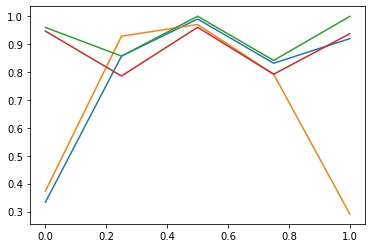

In [99]:
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 5)

plt.plot(x,list(t_results["BernoulliNB()"]))
plt.plot(x,list(t_results["CategoricalNB()"]))
plt.plot(x,list(t_results["GaussianNB()"]))
plt.plot(x,list(t_results["MultinomialNB()"]))

<BarContainer object of 4 artists>

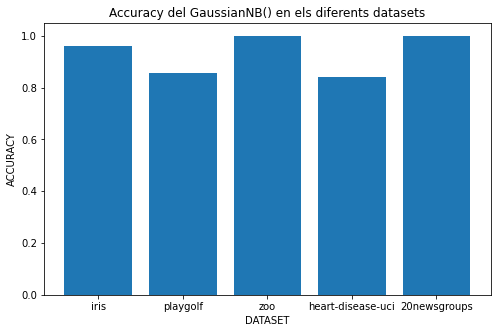

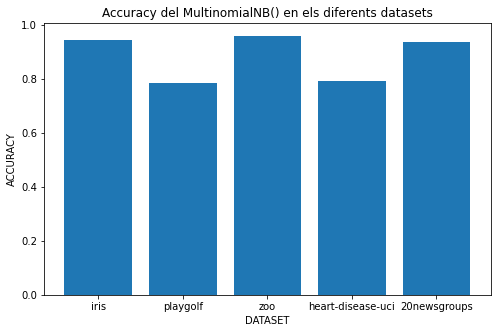

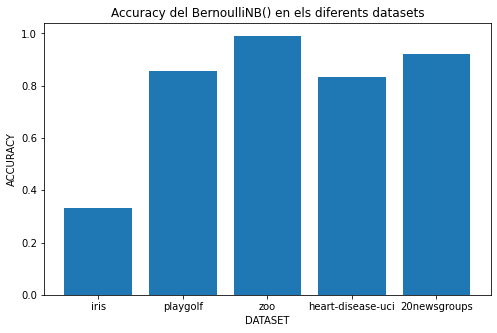

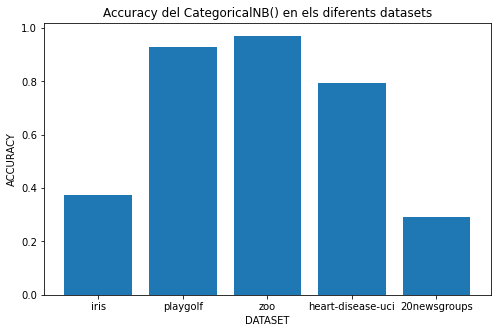

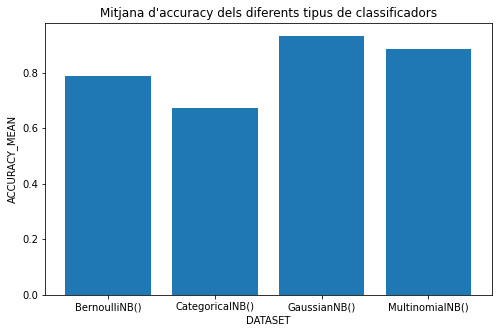

In [100]:
# GaussianNB
fig, ax = plt.subplots(figsize =(8, 5))
ax.set_xlabel('DATASET')
ax.set_ylabel('ACCURACY')
ax.set_title('Accuracy del GaussianNB() en els diferents datasets')
plt.bar(list(t_results['dataset']), list(t_results["GaussianNB()"]))

# MulitnomialNB
fig, ax = plt.subplots(figsize =(8, 5))
ax.set_xlabel('DATASET')
ax.set_ylabel('ACCURACY')
ax.set_title('Accuracy del MultinomialNB() en els diferents datasets')
plt.bar(list(t_results['dataset']), list(t_results["MultinomialNB()"]))

# BernoulliNB
fig, ax = plt.subplots(figsize =(8, 5))
ax.set_xlabel('DATASET')
ax.set_ylabel('ACCURACY')
ax.set_title('Accuracy del BernoulliNB() en els diferents datasets')
plt.bar(list(t_results['dataset']), list(t_results["BernoulliNB()"]))

# CategoricalNB
fig, ax = plt.subplots(figsize =(8, 5))
ax.set_xlabel('DATASET')
ax.set_ylabel('ACCURACY')
ax.set_title('Accuracy del CategoricalNB() en els diferents datasets')
plt.bar(list(t_results['dataset']), list(t_results["CategoricalNB()"]))

# Mitjana 
model_names = ["BernoulliNB()", "CategoricalNB()", "GaussianNB()", "MultinomialNB()"]
models_mean = [sum(list(t_results["BernoulliNB()"]))/5,sum(list(t_results["CategoricalNB()"]))/5,sum(list(t_results["GaussianNB()"]))/5,sum(list(t_results["MultinomialNB()"]))/5]
fig, ax = plt.subplots(figsize =(8, 5))
ax.set_xlabel('DATASET')
ax.set_ylabel('ACCURACY_MEAN')
ax.set_title("Mitjana d'accuracy dels diferents tipus de classificadors")
plt.bar(model_names, models_mean)

Aquests són els **Bayes-Dataset [precisió]** que millor ho fan:
- **GaussianNB - Zoo [100%], seguida de 20newsgroup.**
- **MultinomialNB - Zoo [96%].**
- **BernoulliNB - Zoo [99%].**
- **CategoricalNB - Zoo [97%].**

D'acord amb els resultats, veiem que la BBDD zoo funciona molt bé per a totes les Bayes. Amb relació als models, comparant de forma general la mitjana de l'accuracy per a totes les BBDD, notem que la que obté millors resultats és **GaussianNB()**, seguit del model **MultinomialNB()** i per últim, una mica més lluny, el model **BernoulliNB()**.

Així i tot, no hi ha un model millor que els altres, cada un s'hauria d'aplicar en funció de les dades emmagatzemades en la nostra BBDD, en aquest cas, per la naturalesa d'aquestes, de forma mitjana i general, el model GaussianNB és el que ho fa millor per aquest cas.

4. Et sorprenen el resultats? Com és possible que certs models funcionin per dades que en principi no haurien de funcionar? Explica els atributs més importants de cada classificador. Mostra'n exemples i analitza'ls.

Alguns resultats sí que són coherents i els comprenc, per exemple, que el model GaussianNB funcioni bé amb les BBDD: iris, heart-disease-uci o zoo, ja que aquestes contenen dades amb valors numèrics i continus. Tampoc sorprèn que el model de Bernoulli no funcioni tan bé per la BDDD iris (ja que aquest funciona bé amb dades binàries) o que la BDDD zoo tingui els millors resultats per als diferents models, ja que la mida de la mostra (dades) per determinar la classe d'un animal és considerablement més gran que en les altres BBDD.

En canvi, em sorprèn que hi hagi models com el Bernoulli, per comentar un, que funcioni tan bé per a les diferents BBDD.

Ara veurem els atributs més importants de cada model:

**GaussianNB**
- **class_count_**: nombre de mostres entrenades observades en cada classe.
- **class_prior_**: retorna la probabilitat de cada classe.
- **classes_**: retorna el nom de les classes que coneix el classificador.
- **epsilon_**: indica el valor absolut additiu a les variàncies.
- **sigma_**: la variància de cada característica per a les classes.
- **theta_ indica**: valor mitjà per a cada classe.


**MultinomialNB conté:**
- **class_log_prior**: la probabilitat empírica suavitzada de cada classe.
- **classes_**: les classes que coneix el classificador.
- **feature_count_**: nombre de característiques que hem trobat a cada classe.
- **intercept_**: mostra class_log_prior per interpretar el model com un model lineal.
- **n_features_in_**: el nombre de característiques de cada mostra.


**BernoulliNB:**
- **class_count_**: indica quantes mostres té cada classe.
- **class_log_prior_**: la probabilitat logarítmica de cada classe, suavitzada.
- **classes_**: les etiquetes de classes conegudes pel classificador.
- **feature_count_**: nombre de mostres trobades per a cada classe.
- **n_features_**: nombre de característiques de cada mostra.

**CategoricalNB té:**
- **category_count_**: array de dimensions (n_classes, n_categories) per a cada característica.
- **class_count_**: nombre de característiques trobades per a cada classe.
- **classes_**: les etiquetes de les classes conegudes pel classificador.
- **feature_log_prob_**: array de dimensions (n_classes, n_categories) per a cada característica.
- **n_features_**: nombre de característiques de cada class.

In [101]:
# Models
gaussian = GaussianNB()
multinomial = MultinomialNB()
bernoulli = BernoulliNB()
categorical = CategoricalNB()

# Executem pipeline
_ = experiment("iris", gaussian)
_ = experiment("zoo", multinomial)
_ = experiment("zoo", bernoulli)
_ = experiment("playgolf", categorical)

# ATRIBUTS IMPORTANTS
# GaussianNB
print(f"GaussianNB:\nclass_prior_: {str(gaussian.class_prior_)}\ntheta_: {str(gaussian.theta_)}\n")

# MultinomialNB
print(f"MultinomialNB:\nclass_log_prior_: {str(multinomial.class_log_prior_)}\nn_features_: {str(multinomial.n_features_in_)}\n")

# BernoulliNB
print(f"BernoulliNB:\nfeature_count_: {str(bernoulli.feature_count_)}\nclasses_: {str(bernoulli.classes_)}\n")

# CategoricalNB
print(f"CategoricalNB:\ncategory_count_: {str(categorical.category_count_)}\nfeature_log_prob_: {str(categorical.feature_log_prob_)}")


GaussianNB:
class_prior_: [0.33333333 0.33333333 0.33333333]
theta_: [[0.63367089 0.77909091 0.21188406 0.0984    ]
 [0.75139241 0.62954545 0.6173913  0.5304    ]
 [0.83392405 0.67590909 0.80463768 0.8104    ]]

MultinomialNB:
class_log_prior_: [-0.90154845 -1.61938824 -3.0056826  -2.05017116 -3.22882616 -2.53567898
 -2.31253542]
n_features_: 16

BernoulliNB:
feature_count_: [[39.  0.  1. 41.  2.  6. 22. 40. 41. 41.  0.  4. 38. 35.  8. 32.]
 [ 0. 20. 20.  0. 16.  6.  9.  0. 20. 20.  0.  0. 20. 20.  3.  6.]
 [ 0.  0.  4.  0.  0.  1.  4.  4.  5.  4.  2.  0.  2.  5.  0.  1.]
 [ 0.  0. 13.  0.  0. 13.  9. 13. 13.  0.  1. 13.  0. 13.  1.  4.]
 [ 0.  0.  4.  0.  0.  4.  3.  4.  4.  4.  1.  0.  4.  1.  0.  0.]
 [ 4.  0.  8.  0.  6.  0.  1.  0.  0.  8.  2.  0.  8.  0.  1.  0.]
 [ 0.  0.  9.  0.  0.  6.  8.  0.  0.  3.  2.  0.  6.  1.  0.  1.]]
classes_: [1 2 3 4 5 6 7]

CategoricalNB:
category_count_: [array([[0., 3., 2.],
       [4., 2., 3.]]), array([[1., 2., 2.],
       [3., 2., 4.]]), arra

Aquests són alguns dels atributs que hem explicat, ens serveix per tenir un coneixement de més baix nivell que com està funcionant i processant internament el model Bayes les dades de les BBDD. Per tant, podem seguir el seu procediment i entendre el funcionament.

5. Si el nostre dataset conté dades de diferent naturalesa, és a dir, uns atributs categorics, d'altres continus, d'altres binaris, creus que es podrien combinar els diferents classificadors de bayes? Seguint la formula original, com es faria?


L'única BBDD que compleix les característiques de la pregunta és _heart_, ja que presenta característiques numèriques contínues i binàries. En aquest cas, el que he fet ha estat dividir-les en dues parts (X1, X2) i aplicar un classificador diferent per a cada part. Posteriorment s'ajunten ambdós resultats mitjançant la suma de la matriu de probabilitats de cadascun. L'accuracy total és de 85.4%

In [102]:
heart = pd.read_csv('heart.csv', delimiter=',')
X = heart.drop("target", axis = "columns")
y = heart["target"]

X1 = pd.DataFrame(X, columns = ["sex","cp","fbs","restecg","exang","slope","ca","thal"])
X2 = pd.DataFrame(X, columns = ["age","trestbps","chol","thalach","oldpeak"])

categorical_model = CategoricalNB()
gaussian_model = GaussianNB()

categorical_model.fit(X1,y)
gaussian_model.fit(X2,y)

m_cat = categorical_model.predict_log_proba(X1)
m_gaus = gaussian_model.predict_log_proba(X2)

m = np.exp(m_cat + m_gaus)
suma = np.sum(m, axis=1)
for i in range(len(gaussian_model.classes_)):
    m[:,i] /= suma
    
prediccio = categorical_model.classes_[np.argmax(m, axis=1)]
print(np.sum(prediccio == y) / len(y))

0.8547854785478548


## B. Implementació Naive Bayes (40%)

En aquest apartat implementarem un classificador Ingenu de Bayes per cada un dels tipus de dades. Per fer això, i que sigui fàcil de comparar amb els resultats del apartat anterior, feu servir un esquelet similar al següent:
        


### NaiveBayes Base

In [103]:
class NaiveBayes(object):
    def __init__(self, alpha):
        self.alpha = alpha
        self.n_samples = 0
        self.class_count_ = []  # numero de exemples de cada categoria
        self.class_prior_ = []  # prior per cada categoria
        self.classes_ = []      # nom o etiqueta de cada label
        

    def __str__(self):
        # toString()  
        return (self.__class__.__name__+"()")
        
    def calcular_conditional(self, X, y):
        """
        Compute the conditional probability for the training data for each feature
        """
        raise("TO BE DONE. Ho heu que implementar per cada subclasse")
    
    def calcular_likelihood_log(self, X):
        """
        Compute the unnormalized posterior log probability of X
        """
        raise("TO BE DONE. Ho heu que implementar per cada subclasse")

    def calcular_prior(self, y):
        """
        Compute the class prior
        """
        a, b = np.unique(y, return_counts=True)
        for i in range(len(a)):
            self.class_prior_.append(b[i]/self.n_samples_)
        return a, self.class_prior_


    def predict(self, X):
        probs = self.predict_proba(X)
        return self.classes_[np.argmax(probs, axis=1)]
    
    def predict_proba(self, X):
        probs = np.exp(self.predict_log_proba(X))
        total_sum = np.sum(probs, axis=1)
        for i in range(len(self.classes_)):
            probs[:,i] /= total_sum
        return probs

    def predict_log_proba(self, X):
        probs = self.calcular_likelihood_log(X)
        for i in range(len(self.classes_)):
            probs[:,i] += np.log(self.class_prior_[i])
        return probs

    
    def score(self, X, y):
        return np.sum(self.predict(X) == y) / len(y)
        
    def fit(self, X, y):

        self.n_samples_ = X.shape[0]
        self.classes_ = np.unique(y)

        # calcular p(y)
        self.calcular_prior(y)
        
        # per cada una de les columnes de x
        # calcular p(xi | y)
        self.calcular_conditional(X, y)
        


### GaussianNaiveBayes

In [104]:
class GaussianNaiveBayes(NaiveBayes):
    def __init__(self, alpha=1):
        super().__init__(alpha)
        self.theta_ = None  # mean
        self.sigma_ = None  # var
        

    def calcular_conditional(self, X, y):
        # todo
        # heu de calcular la mitjana i la variança per cada una de les categories y
        self.theta_ = np.zeros((len(self.classes_), X.shape[1]))
        self.sigma_ = np.zeros((len(self.classes_), X.shape[1]))
        for i, c in enumerate(self.classes_):
            rows = np.where(y==c)[0]
            matriu = np.zeros((len(rows), X.shape[1]))
            for idx, r in enumerate(rows):
                matriu[idx] = X[r]
            self.theta_[i] = np.mean(matriu, axis=0)
            self.sigma_[i] = np.var(matriu, axis=0)
                                
    def calcular_likelihood_log(self, X):
        # aplicar la formula de com s'apropa X a les vostres theha i sigma..
        # tip: recomenat utilitzar suma de logaritmes enlloc de productes per estabilitat
        likelihood = np.zeros((self.n_samples_, len(self.classes_)))
        for i in range(self.n_samples_):
            for j in range(len(self.classes_)):
                s = self.sigma_[j,:]
                s[s == 0] = np.inf
                likelihood[i, j] = np.sum((1/np.sqrt(2*np.pi*s**2)) * np.exp(-(((X[i] - self.theta_[j])**2)/(2*s**2))))
        return likelihood       

In [105]:
X, y = load_dataset("heart-disease-uci")

gaussian = GaussianNaiveBayes()
gaussian.fit(X, y)
gaussian.score(X, y)

0.6732673267326733

### CategoricalNaiveBayes

In [106]:
class CategoricalNaiveBayes(NaiveBayes):
    def __init__(self, alpha=1):
        super().__init__(alpha)
        self.category_count_ = []
        self.feature_log_prob_ = []
        self.indices_map = []
        self.n_features = []
            
    def calcular_conditional(self, X, y):
        # todo
        # comptar quants cops apareix cada categoria
        # convertir els counts a probabilitats segons la formula
        self.conditional_probabilities = [0] * X.shape[1]
        for i in range(X.shape[1]):
            self.indices_map.append({})
            diff = np.unique(X[:,i])
            p = np.zeros((len(diff), len(self.classes_)))
            for d in range(len(diff)):
                self.indices_map[i][d] = diff[d]
                for c in range(len(self.classes_)):
                    p[d, c] = (sum((X[:,i] == diff[d]) & (y == self.classes_[c])) + self.alpha) / (sum(y == self.classes_[c]) + self.alpha * len(diff))
            self.conditional_probabilities[i] = p
        self.n_features = X.shape[1]
        
    def calcular_likelihood_log(self, X):
        # todo
        # sumar el logaritme de les probabilitats segons X
        self.feature_log_prob_ = np.zeros((self.n_samples_, len(self.classes_)))
        for i in range(self.n_samples_):
            for j in range(len(self.classes_)):
                cumsum = 0
                for k in range(self.n_features):
                    cumsum += np.log(self.conditional_probabilities[k][list(self.indices_map[k].values()).index(X[i,k])][j])
                self.feature_log_prob_[i][j] = cumsum
        return self.feature_log_prob_


#### Preguntes
Per aquest apartat, intenteu de fer-ho en python directament, per a poder debugar el codi més fàcilment. Compareu el vostre resultat amb el de sklearn. Feu-ho també per passos intermitjos, i veure que ho esteu fent correctament.

1. Implementa $P(x_i|y)$ per dades categoriques (Categorical Naive Bayes)
2. Implementa $P(x_i|y)$ per dades continues (Gaussian Naive Bayes)
3. Compara els resultats obtinguts amb els de sklearn. S'assemblen?

In [107]:
# Càrreguem dades
X_iris, y_iris = load_dataset("iris")
X_playgolf, y_playgolf = load_dataset("playgolf")

# Instàncies dels models
sklearn_gaussian = GaussianNB()
mine_gaussian = GaussianNaiveBayes()

sklearn_categorical = CategoricalNB()
mine_categorical = CategoricalNaiveBayes()

# Ajustament
sklearn_gaussian.fit(X_iris, y_iris)
mine_gaussian.fit(X_iris, y_iris)

sklearn_categorical.fit(X_playgolf, y_playgolf)
mine_categorical.fit(X_playgolf, y_playgolf)

# Scores en forma de Datagrame
scores = np.array([
    [sklearn_gaussian.score(X_iris, y_iris), mine_gaussian.score(X_iris, y_iris)],
    [sklearn_categorical.score(X_playgolf, y_playgolf), mine_categorical.score(X_playgolf, y_playgolf)]]
).transpose()

scores_pd = pd.DataFrame(data = scores, index=["Sklearn", "Mine"], columns=["Gaussian Model", "Categorical Model"])

# Visualitzem resultats
display(scores_pd)


,Gaussian Model,Categorical Model
Sklearn,0.960000,0.928571
Mine,0.633333,0.928571


## Appendix 
#### (no s'hi ha de fer res, tan sols es per si us ajuda a entendre-ho tot millor)

<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*Aquesta subsecció conté parts extretes de [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; i està disponible a [GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*



Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets.

Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.

This section will focus on an intuitive explanation of how naive Bayes classifiers work, followed by a couple examples of them in action on some datasets.

### Bayesian Classification

Naive Bayes classifiers are built on Bayesian classification methods.

These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.

In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.

Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.

Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.

Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.

The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.

Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

We begin with the standard imports:

In [108]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes.
In this classifier, the assumption is that *data from each label is drawn from a simple Gaussian distribution*.
Imagine that you have the following data:

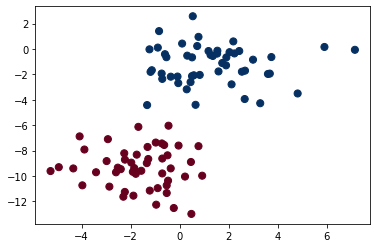

In [109]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions.

This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.

The result of this naive Gaussian assumption is shown in the following figure:

The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses.

With this generative model in place for each class, we have a simple recipe to compute the likelihood $P({\rm features}~|~L_1)$ for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

This procedure is implemented in Scikit-Learn's ``sklearn.naive_bayes.GaussianNB`` estimator:

In [110]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

Now let's generate some new data and predict the label:

In [111]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Now we can plot this new data to get an idea of where the decision boundary is:

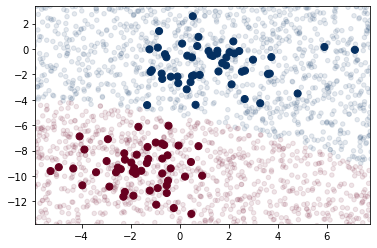

In [112]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.

A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the ``predict_proba`` method:

In [113]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [114]:
model.classes_

array([0, 1])

The columns give the posterior probabilities of the first and second label, respectively.
If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

Of course, the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results.
Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a useful method.

## Multinomial Naive Bayes

The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label.
Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution.
The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribution with a best-fit multinomial distribution.

### Example: Classifying Text

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.
We discussed the extraction of such features from text in [Feature Engineering](05.04-Feature-Engineering.ipynb); here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

Let's download the data and take a look at the target names:

In [115]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity here, we will select just a few of these categories, and download the training and testing set:

In [116]:
categories = ['talk.religion.misc', 'soc.religion.christian',
             'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Here is a representative entry from the data:

In [117]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



Show the distributions of lengths of the emails

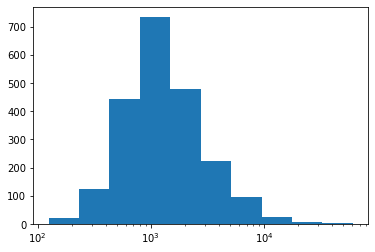

In [118]:
lens = [len(d) for d in train.data]

def plot_loghist(x, bins):
  hist, bins = np.histogram(x, bins=bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  plt.hist(x, bins=logbins)
  plt.xscale('log')

plot_loghist(lens, 10)


In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.
For this we will use the TF-IDF vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

With this pipeline, we can apply the model to the training data, and predict labels for the test data:

In [120]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.
For example, here is the confusion matrix between the true and predicted labels for the test data:

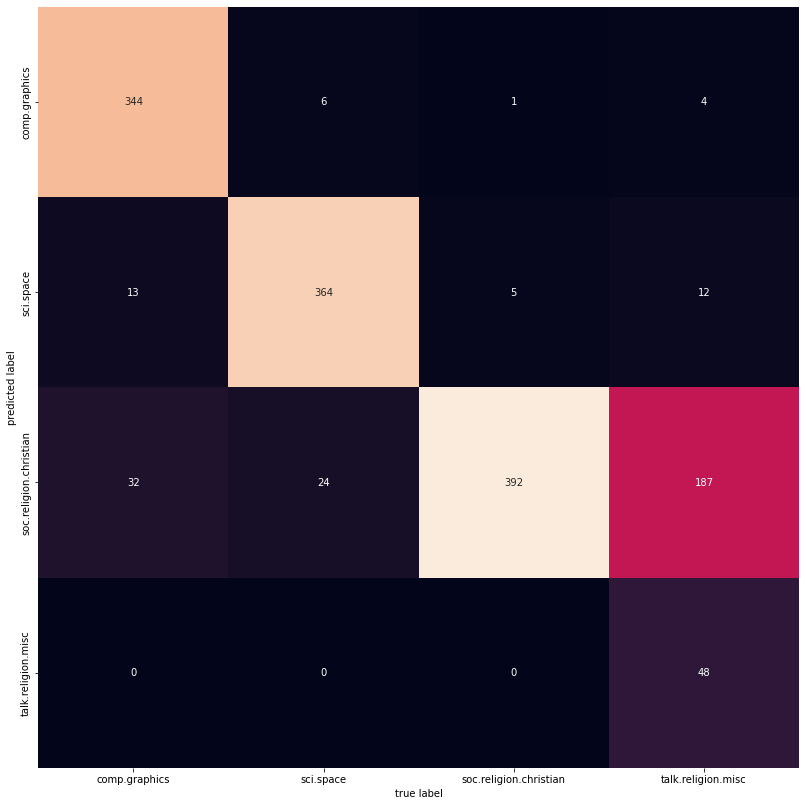

In [121]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
plt.figure(figsize=(20,14))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity.
This is perhaps an expected area of confusion!

The very cool thing here is that we now have the tools to determine the category for *any* string, using the ``predict()`` method of this pipeline.
Here's a quick utility function that will return the prediction for a single string:

In [122]:
from sklearn.metrics import classification_report
print(classification_report(test.target, labels))


              precision    recall  f1-score   support

           0       0.97      0.88      0.92       389
           1       0.92      0.92      0.92       394
           2       0.62      0.98      0.76       398
           3       1.00      0.19      0.32       251

    accuracy                           0.80      1432
   macro avg       0.88      0.75      0.73      1432
weighted avg       0.86      0.80      0.77      1432



In [123]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Let's try it out:

In [124]:
predict_category('sending a payload to the ISS')

'sci.space'

In [125]:
predict_category('sending bytes to the network')

'comp.graphics'

In [126]:
predict_category('sending chocolate')

'sci.space'

In [127]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [128]:
predict_category('determining the screen resolution')

'comp.graphics'

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking.
Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.

## When to Use Naive Bayes

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model.
That said, they have several advantages:

- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification.
If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem.
If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in *every single dimension* to be close overall).
This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information.
For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.


